In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt


In [2]:
final_df = pd.read_parquet('../data/curated/final_merchant_statistics')

In [3]:
final_df.head(5)

,merchant_abn,name,tags,tag,revenue_level,take_rate,avg_monthly_rev,discounted_avg_monthly_rev,avg_monthly_orders,avg_monthly_approximate_fraudulent_orders,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,33489.414831,31212.390987,155.285714,10.291294,...,1265.899881,1179.828379,0.066273,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,322.627546,293.624542,0.285714,0.023447,...,241.873872,220.130319,0.082063,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
2,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,1199.688719,1115.494137,3.523810,0.239352,...,1665.287911,1548.417412,0.067924,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
3,10648956813,Proin Nisl Institute,"[(computeRs, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.66,67600.014150,63315.538691,1046.714286,66.195694,...,94545.379790,88553.112413,0.063241,2208.0,825.551750,1574.0,14380.0,98.720466,57.083817,710.0
4,10714068705,Sollicitudin Commodo Ipsum Industries,"([furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.51,20738.569079,19367.206736,163.714286,10.545664,...,10931.299762,10208.454670,0.064415,1715.0,796.782831,10.0,3221.0,135.209547,113.737044,145.0


In [4]:
final_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 'take_rate',
       'avg_monthly_rev', 'discounted_avg_monthly_rev', 'avg_monthly_orders',
       'avg_monthly_approximate_fraudulent_orders', 'std_monthly_revenue',
       'std_monthly_discounted_revenue', 'sales_revenue',
       'discounted_sales_revenue', 'num_orders',
       'approximate_fraudulent_orders', 'avg_daily_rev',
       'discounted_avg_daily_rev', 'avg_value_per_order',
       'discounted_avg_value_per_order', 'avg_daily_orders',
       'avg_daily_approximate_fraudulent_orders', 'std_daily_revenue',
       'std_daily_discounted_revenue', 'avg_daily_commission',
       'discounted_avg_daily_commission', 'avg_monthly_commission',
       'discounted_avg_monthly_commission', 'avg_commission_per_order',
       'discounted_avg_commission_per_order', 'overall_commission',
       'discounted_overall_commission', 'overall_fraud_rate',
       'sa2_region_count', 'median_customer_income', 'returning_customers',
       '

In [5]:
['merchant_abn', 'name', 'tags', 'tag', 'revenue_level',
 
]

['merchant_abn', 'name', 'tags', 'tag', 'revenue_level']

In [6]:
# Assign the Features to the different challenges of BNPL
feature_dict = {
    'exposure': [
        'sa2_region_count',
        'unique_customers',
        'returning_customers',
    ],
    'risk': [
        'median_customer_income',
        'vip_customers',
    ],
    'fraud': [
        'overall_fraud_rate',
        'approximate_fraudulent_orders',
        'avg_monthly_approximate_fraudulent_orders',
        'avg_daily_approximate_fraudulent_orders',
    ],
    'performance': [
        'take_rate',

        'sales_revenue',
        'discounted_sales_revenue',

        'overall_commission',
        'discounted_overall_commission',

        'avg_value_per_order',
        'discounted_avg_value_per_order',

        'avg_commission_per_order',
        'discounted_avg_commission_per_order',
        
        'avg_monthly_orders',
        'avg_monthly_rev',
        'std_monthly_revenue',
        
        'discounted_avg_monthly_rev',
        'std_monthly_discounted_revenue',
        
        'avg_monthly_commission',
        'discounted_avg_monthly_commission',

        'avg_daily_orders',
        'avg_daily_rev',
        'std_daily_revenue',

        'discounted_avg_daily_rev',
        'std_daily_discounted_revenue',

        'avg_daily_commission',
        'discounted_avg_daily_commission',

        'mean_spending', 
        'std_spending',
    ]
}

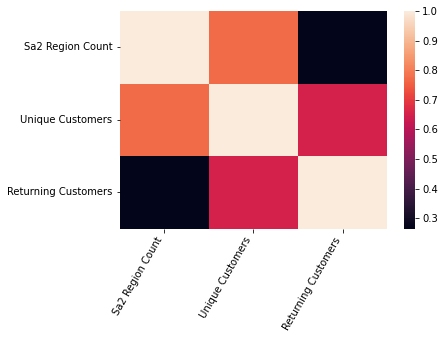

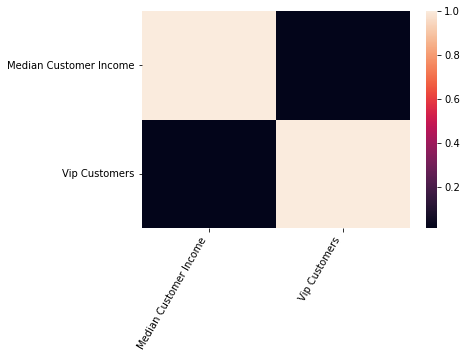

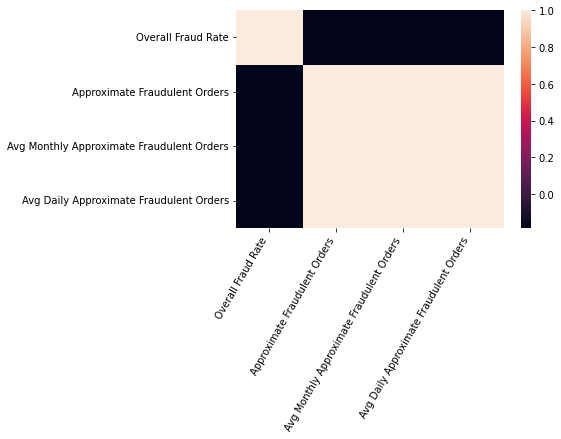

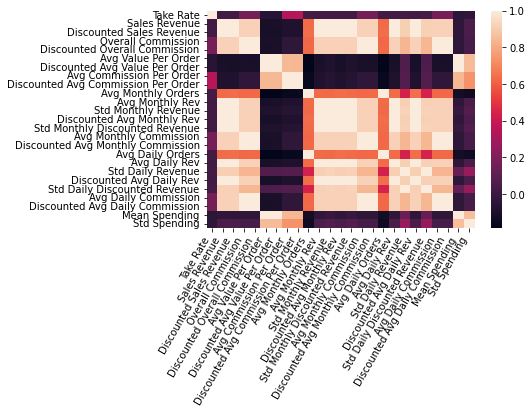

In [7]:
import seaborn as sns
# corr = final_df.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

for challenge, feature_list in feature_dict.items():
    corr = final_df[feature_list].corr()

    def capitalized_spaced(colname: str):
        return ' '.join([
            w.capitalize()
            for w in colname.split('_')
        ])
    column_names = [capitalized_spaced(cn) for cn in corr.columns.values]

    plt.figure()
    hm = sns.heatmap(corr, 
        xticklabels=column_names,
        yticklabels=column_names)
    plt.xticks(rotation=60, ha='right')
    plt.yticks(rotation=0)
    hm.figure.savefig(f'../plots/{challenge}-correlation.png', 
        bbox_inches = 'tight', dpi = 500)

In [8]:
final_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 'take_rate',
       'avg_monthly_rev', 'discounted_avg_monthly_rev', 'avg_monthly_orders',
       'avg_monthly_approximate_fraudulent_orders', 'std_monthly_revenue',
       'std_monthly_discounted_revenue', 'sales_revenue',
       'discounted_sales_revenue', 'num_orders',
       'approximate_fraudulent_orders', 'avg_daily_rev',
       'discounted_avg_daily_rev', 'avg_value_per_order',
       'discounted_avg_value_per_order', 'avg_daily_orders',
       'avg_daily_approximate_fraudulent_orders', 'std_daily_revenue',
       'std_daily_discounted_revenue', 'avg_daily_commission',
       'discounted_avg_daily_commission', 'avg_monthly_commission',
       'discounted_avg_monthly_commission', 'avg_commission_per_order',
       'discounted_avg_commission_per_order', 'overall_commission',
       'discounted_overall_commission', 'overall_fraud_rate',
       'sa2_region_count', 'median_customer_income', 'returning_customers',
       '

In [19]:
final_df[['merchant_abn', 'std_monthly_revenue', 'avg_monthly_rev']] \
    .sort_values('avg_monthly_rev').tail(1000).head(20)

,merchant_abn,std_monthly_revenue,avg_monthly_rev
1426,82329510503,458.009859,208.397983
2483,55622580330,626.752691,586.356591
2718,46391946761,772.564001,735.665993
1738,99990536339,829.796969,835.618158
2761,64196096120,411.312219,879.798389
1520,22678591293,960.031577,944.329873
1676,79008028287,385.773815,990.367593
221,78916025936,899.160463,1000.746242
3403,36758807067,357.463515,1009.745753
3547,96336573256,928.086417,1058.112595


In [9]:
final_df = final_df[final_df['revenue_level']  == 'e'] \
    .sort_values('std_monthly_revenue')

In [10]:
print(final_df[['merchant_abn', 'std_monthly_revenue']].head(5))
print(final_df[['merchant_abn', 'std_monthly_revenue']].tail(5))

      merchant_abn  std_monthly_revenue
3403   36758807067           357.463515
1897   78080443264           385.171740
1676   79008028287           385.773815
652    59358011432           399.557235
2744   57079678065           407.557979
      merchant_abn  std_monthly_revenue
2686   33226000026         13557.994340
1293   34920839316         17630.259142
1919   83000061755         18311.942067
1136   67609108741         18514.686749
1074   41944909975        116651.465429


In [11]:
print(final_df[final_df['num_orders'] > 100][['merchant_abn', 'std_monthly_revenue']].head(5))
print(final_df[final_df['num_orders'] > 100][['merchant_abn', 'std_monthly_revenue']].tail(5))

      merchant_abn  std_monthly_revenue
3403   36758807067           357.463515
1897   78080443264           385.171740
1676   79008028287           385.773815
652    59358011432           399.557235
2744   57079678065           407.557979
      merchant_abn  std_monthly_revenue
2686   33226000026         13557.994340
1293   34920839316         17630.259142
1919   83000061755         18311.942067
1136   67609108741         18514.686749
1074   41944909975        116651.465429
